In [31]:
import numpy as np
import tensorflow as tf
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

8


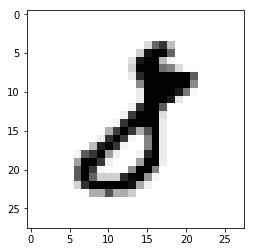

In [32]:
import matplotlib.pyplot as plt
#matplotlib inline # Only use this if using iPython
image_index = np.random.randint(60000) #7777 # You may select anything up to 60,000
print(y_train[image_index]) # The label is printed
plt.imshow(x_train[image_index], cmap='Greys')
plt.show()

In [33]:
# Reshaping the array to 4-dims so that it can work with the Keras API
x_train = x_train.reshape(x_train.shape[0], 28, 28, 1)
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1)
input_shape = (28, 28, 1)
# Making sure that the values are float so that we can get decimal points after division
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
# Normalizing the RGB codes by dividing it to the max RGB value.
x_train /= 255
x_test /= 255
print('x_train shape:', x_train.shape)
print('Number of images in x_train', x_train.shape[0])
print('Number of images in x_test', x_test.shape[0])
y_train.shape

x_train shape: (60000, 28, 28, 1)
Number of images in x_train 60000
Number of images in x_test 10000


(60000,)

In [35]:
# Importing the required Keras modules containing model and layers
from keras.models import Sequential
from keras.layers import Dense, Conv2D, Dropout, Flatten, MaxPooling2D
# Creating a Sequential Model and adding the layers
model = Sequential()
layer1=Conv2D(28, kernel_size=(3,3), input_shape=input_shape)
layer1.trainable=True
model.add(layer1) # (3,3) for mnist
model.add(MaxPooling2D(pool_size=(2, 2))) # (2,2) for mnist
model.add(Flatten()) # Flattening the 2D arrays for fully connected layers
layer2 = Dense(128, activation=tf.nn.relu,kernel_initializer='random_uniform')#glorot_uniform is by default
layer2.trainable=False#True
model.add(layer2)
#layer3 = Dense(2*128, activation=tf.nn.relu,kernel_initializer='random_uniform')
#layer3.trainable=False
#model.add(layer3)
model.add(Dropout(0.2))
model.add(Dense(10,activation=tf.nn.softmax))

In [36]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 26, 26, 28)        280       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 13, 13, 28)        0         
_________________________________________________________________
flatten_4 (Flatten)          (None, 4732)              0         
_________________________________________________________________
dense_11 (Dense)             (None, 128)               605824    
_________________________________________________________________
dropout_3 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_12 (Dense)             (None, 10)                1290      
Total params: 607,394
Trainable params: 1,570
Non-trainable params: 605,824
_________________________________________________________________


In [37]:
model.compile(optimizer='adam', 
              loss='sparse_categorical_crossentropy', 
              metrics=['accuracy'])
for i in range(1):
    model.fit(x=x_train,y=y_train, epochs=1)
    x = model.evaluate(x_test, y_test)
    print('\n',x)

Epoch 1/1
 9984/10000 [============================>.] - ETA: 0s
 [0.34907171615362165, 0.9]


In [7]:
from keras import initializers

model = Sequential()
layer1=Dense(128,activation=tf.nn.relu, input_shape=input_shape)#128
layer1.trainable=False
model.add(layer1)
layer2=Dense(32,activation=tf.nn.relu)#128
layer2.trainable=False
model.add(layer2)
#model.add(Flatten())
#layer4=Dense(128,activation=tf.nn.relu)
#layer4.trainable=False
#layer5=ConvexCombination()([layer2,layer4])
for i in range(3):
    layer3=Dense(128,activation=tf.nn.relu,kernel_initializer=initializers.random_normal(0,0.1))   
    layer3.trainable=False
    model.add(layer3)
#model.add(MaxPooling2D(pool_size=(2, 2))) # (2,2) for mnist
model.add(Flatten()) # Flattening the 2D arrays for fully connected layers
#for i in range(5):
#    layer3 = Dense(128, activation=tf.nn.relu,kernel_initializer='random_uniform')#glorot_uniform is by default
#    layer3.trainable=False
#    model.add(layer3)
#layer3 = Dense(2*128, activation=tf.nn.relu,kernel_initializer='random_uniform')
#layer3.trainable=False
#model.add(layer3)
#model.add(Dropout(0.2))
#layer4=Dense(100,activation='linear')
#layer4.trainable=False
#model.add(layer4)
model.add(Dense(10,activation=tf.nn.softmax))

In [8]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 28, 28, 128)       256       
_________________________________________________________________
dense_4 (Dense)              (None, 28, 28, 32)        4128      
_________________________________________________________________
dense_5 (Dense)              (None, 28, 28, 128)       4224      
_________________________________________________________________
dense_6 (Dense)              (None, 28, 28, 128)       16512     
_________________________________________________________________
dense_7 (Dense)              (None, 28, 28, 128)       16512     
_________________________________________________________________
flatten_2 (Flatten)          (None, 100352)            0         
_________________________________________________________________
dense_8 (Dense)              (None, 10)                1003530   
Total para

In [9]:
model.compile(optimizer='adam', 
              loss='sparse_categorical_crossentropy', 
              metrics=['accuracy'])
for i in range(2):
    model.fit(x=x_train,y=y_train, epochs=1)
    x = model.evaluate(x_test, y_test)
    print('\n',x)

Epoch 1/1
 9984/10000 [============================>.] - ETA: 0s
 [0.2989641479730606, 0.9163]
Epoch 1/1
 9984/10000 [============================>.] - ETA: 0s
 [0.27485452416837214, 0.9222]


In [38]:
import numpy as np
import scipy as sp
from matplotlib import pyplot as plt

In [39]:
d=2
M=30 

def nilpotent(M):
    B = np.zeros((M,M))
    for i in range(2,M):
        B[i,i-1]=1.0
    return B

def canonical(i,M):
    e = np.zeros((M,1))
    e[i,0]=1.0
    return e

def vectorfieldoperator(state,increment):
    d = np.shape(increment)[0]
    N = np.shape(state)[0]
    direction = np.zeros((N,1))
    for i in range(d):
        helper = np.zeros((N,1))
        for j in range(N):
            helper[j]=np.sin((j+1)*state[j,0])
        direction=direction + helper*increment[i]
    return direction

def vectorfield2d(state,increment):
    return np.array([(2.0*np.sqrt(state[1]**2))**0.7,1.0*state[1]])*increment[0]+np.array([(2.0*np.sqrt(state[1]**2))**0.7,0.0*state[1]])*increment[1]

def vectorfield3d(state,increment):
    return np.array([np.sin(state[0])*np.exp(-state[2]),np.cos(state[1]),-state[2]*state[1]])*increment[0]+np.array([np.sin(state[1]),np.cos(state[0]),-state[0]*state[1]])*increment[1]
def vectorfield(state,increment):
    return 5*np.exp(-state)*increment[0] + 5*np.cos(state)*increment[1]
def randomAbeta(d,M):
    A = []
    beta = []
    for i in range(d):
        #B = 0.1*np.identity(M)+np.random.normal(0.0,.5,size=(M,M))
        B = 0.0*nilpotent(M) + np.random.normal(0.0,0.5,size=(M,M)) # 0.1 for scen-gen, 1.5 for SABR
        B = np.random.permutation(B)
        #B = np.identity(M)
        #B = sp.linalg.sqrtm(np.matmul(B,np.transpose(B)))
        A = A + [B]
        beta = beta + [canonical(i,M)+np.random.normal(0.0,0.1,size=(M,1))]
    return [A,beta]

Abeta = randomAbeta(d,M)
A = Abeta[0]
beta = Abeta[1]

def sigmoid(x):
    return np.tanh(x)

def reservoirfield(state,increment):
    value = np.zeros((M,1))
    for i in range(d):
        value = value + sigmoid(np.matmul(A[i],state) + beta[i])*increment[i]
    return value

In [40]:
class SDE:
    def __init__(self,timehorizon,initialvalue,dimension,dimensionBM,dimensionR,vectorfield,timesteps,):
        self.timehorizon = timehorizon
        self.initialvalue = initialvalue # np array
        self.dimension = dimension
        self.dimensionBM = dimensionBM
        self.dimensionR = dimensionR
        self.vectorfield = vectorfield
        self.timesteps = timesteps

    def path(self):
        BMpath = [np.zeros(self.dimensionBM)]
        SDEpath = [np.array([1.0, self.initialvalue])]#[np.ones((self.dimension,1))*self.initialvalue]
        
        for i in range(self.timesteps):
            helper = np.random.normal(0,np.sqrt(self.timehorizon/self.timesteps),self.dimensionBM)
            BMpath = BMpath + [BMpath[-1]+helper]
            SDEpath = SDEpath + [np.exp(-1.0*self.timehorizon/self.timesteps)*(SDEpath[-1]+self.vectorfield(SDEpath[-1],helper))]
            #np.ones(self.dimensionBM)*self.timehorizon/self.timesteps
        return [BMpath, SDEpath]
    
    def anypath(self):
        BMpath = [np.zeros(self.dimensionBM)]
        SDEpath = [np.array([1.0, self.initialvalue])]#[np.ones((self.dimension,1))*self.initialvalue]
        
        for i in range(self.timesteps):
            helper = np.cos(BMpath[-1]*50)*self.timehorizon/self.timesteps#np.random.normal(0,np.sqrt(self.timehorizon/self.timesteps),self.dimensionBM)
            BMpath = BMpath + [BMpath[-1]+helper]
            SDEpath = SDEpath + [np.exp(-1.0*self.timehorizon/self.timesteps)*(SDEpath[-1]+self.vectorfield(SDEpath[-1],helper))]
            
        return [BMpath, SDEpath]
        
    def reservoir(self,BMpath):
        reservoirpath = [canonical(0,self.dimensionR)*self.initialvalue]
        for i in range(self.timesteps):
            increment = BMpath[i+1]-BMpath[i]
            reservoirpath = reservoirpath + [np.exp(-0.2*self.timehorizon/self.timesteps)*(reservoirpath[-1]+reservoirfield(reservoirpath[-1],increment))]
        return reservoirpath

In [41]:
Sabr = SDE(1,1.0,2,d,M,vectorfield2d,10000)
training = Sabr.path()

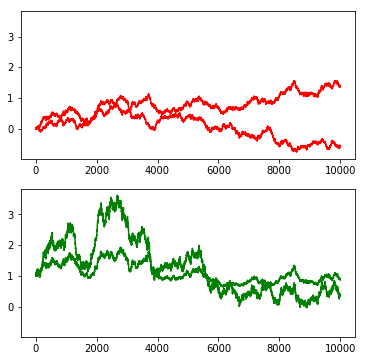

In [42]:
f1,p1=plt.subplots(2,1,figsize=(6,6),sharey=True)
p1[0].plot(training[0][:10000],'r')
p1[1].plot(training[1][:10000],'g')
plt.savefig('trainingpath.pdf')
plt.show()

In [43]:
BMpath=training[0]
Y = training[1]
Ydata = np.squeeze(Y)
Ydatadiff = np.diff(Ydata,axis=0)
Ytrain = np.concatenate((Ydata[:1000],Ydatadiff[:1000:1]),axis=0)
np.shape(Ytrain)

(2000, 2)

In [44]:
X=Sabr.reservoir(BMpath)
np.shape(X)
Xdata = np.squeeze(X)
Xdatadiff = np.diff(Xdata,axis=0)
Xtrain=np.concatenate((Xdata[:1000],Xdatadiff[:1000:1]),axis=0)
np.shape(Xtrain)

(2000, 30)

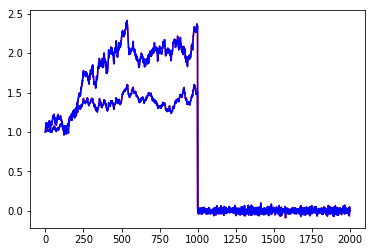

array([[ 1.00080484,  2.3673805 ,  0.63501126, -2.27607374,  1.56750933,
        -0.95429088,  3.4036749 , -2.98390003, -2.23243601,  0.509947  ,
        -0.85751743, -3.75087794, -4.40228551, -0.4132388 ,  1.42981188,
         1.37784043, -2.33078058, -0.38945827,  0.47059236,  1.08154893,
         2.49170702, -5.04578393, -0.62171948, -0.17873719, -0.00862905,
         1.50927391,  2.00426942,  1.1262557 ,  2.42182526, -1.10949677],
       [ 1.0008133 ,  1.80244445,  0.58312286, -1.48340101,  0.6443684 ,
        -0.71516618,  2.45875407, -1.96656073, -2.06044604,  0.7069785 ,
        -0.85823217, -2.78958296, -3.21208676, -0.39835437,  1.67733257,
         1.09054162, -2.79822803, -0.55164615,  0.38076437, -0.01209597,
         1.81690331, -3.36302708, -0.78326256, -0.30215913, -0.01386862,
         1.5253206 ,  1.4588003 ,  0.77997148,  0.94744706, -0.70905751]])

In [45]:
from sklearn import linear_model
import pandas as pd
lm = linear_model.LinearRegression()
model = lm.fit(Xtrain,Ytrain)
plt.plot(model.predict(Xtrain),'r')
plt.plot(Ytrain,'b')
plt.show()
model.score(Xtrain,Ytrain)
model.coef_

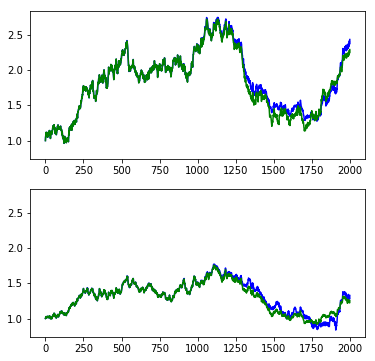

In [46]:
f,p=plt.subplots(2,1,figsize=(6,6),sharey=True)
N=2

for i in range(N):
    p[i].plot(model.predict(Xdata[:2000])[:,i],'b')
    p[i].plot(Ydata[:2000][:,i],'g')
plt.savefig('training.pdf')
plt.show()

In [47]:
generalization = Sabr.path()
BMpath = generalization[0]
Y = generalization[1]
Ydata = np.squeeze(Y)

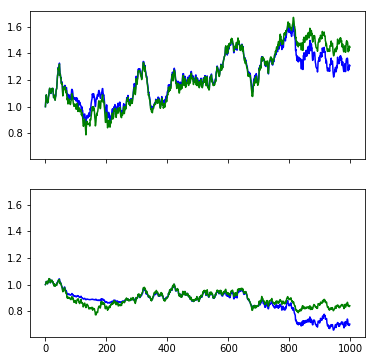

In [48]:
#X=geometricBM.reservoir(BMpath)
X = Sabr.reservoir(BMpath)
Xdata = np.squeeze(X)

N=2

fig,p=plt.subplots(N, 1, figsize=(6,6),sharex=True, sharey=True)
for i in range(N):
    p[i].plot(model.predict(Xdata[:1000])[:,i],'b')
    p[i].plot(Ydata[:1000][:,i],'g')
plt.savefig('generalization.pdf')
plt.show()